In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import sys
import scipy.stats as stats
import numpy as np
import pickle

In [15]:
CO2 = pd.read_csv('./../co2_temp_data/deseasonal_co2_month.csv', index_col='Date')
CO2.head()

,CO2
Date,
1959.0411,315.27
1959.1260,315.34
1959.2027,315.41
1959.2877,315.48
1959.3699,315.55


In [3]:
filedir = './../Output/output_raw/output_all/JENA_s76_all/spatial.pik'
JENA_s76 = pickle.load(open(filedir, 'rb'))

In [45]:
CO2.loc[1976.0410:].index

Float64Index([1976.0410000000002,          1976.1257,          1976.2049,
                       1976.2896,          1976.3716,          1976.4563,
                       1976.5383, 1976.6229999999998,          1976.7077,
                       1976.7896,
              ...
                       2017.2027,          2017.2877,          2017.3699,
                       2017.4548,           2017.537,          2017.6219,
                       2017.7068,           2017.789,           2017.874,
                       2017.9562],
             dtype='float64', name='Date', length=504)

In [55]:
ocean = pd.DataFrame({"Date": CO2.loc[1976.0410:].index, 
                      "CO2": CO2.loc[1976.0410:].CO2.values,
                      "ocean": JENA_s76.Earth_Ocean.values})
ocean.set_index("Date", inplace=True)
ocean.head()

,CO2,ocean
Date,,
1976.0410,330.14,-0.223051
1976.1257,330.21,-0.205602
1976.2049,330.27,-0.206325
1976.2896,330.34,-0.183559
1976.3716,330.41,-0.152305


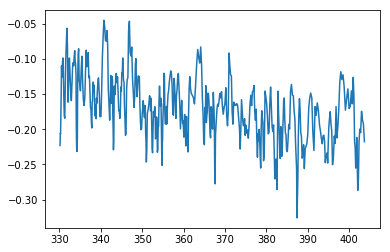

In [57]:
plt.plot(ocean.CO2, ocean.ocean)

In [58]:
ocean_reg = stats.linregress(ocean.index, ocean.ocean)

In [59]:
y_ocean = ocean_reg[0]*ocean.index + ocean_reg[1]

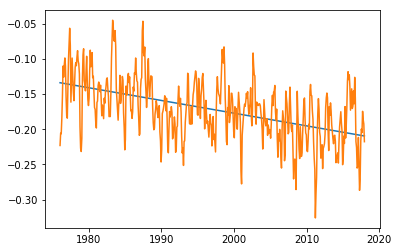

In [62]:
plt.plot(ocean.index, y_ocean)
plt.plot(ocean.index, ocean.ocean)

In [81]:
(ocean.ocean)/y_ocean

Date
1976.0410    1.667083
1976.1257    1.534913
1976.2049    1.538665
1976.2896    1.367331
1976.3716    1.133270
1976.4563    0.817916
1976.5383    0.934565
1976.6230    0.804536
1976.7077    0.729946
1976.7896    0.815682
1976.8743    1.142425
1976.9563    1.334432
1977.0411    1.358427
1977.1260    1.013005
1977.2027    0.742726
1977.2877    0.584686
1977.3699    0.413309
1977.4548    0.589853
1977.5370    1.182433
1977.6219    0.929923
1977.7068    0.721370
1977.7890    0.897387
1977.8740    1.073340
1977.9562    1.160925
1978.0411    0.983470
1978.1260    0.812591
1978.2027    0.764748
1978.2877    0.795064
1978.3699    0.703994
1978.4548    0.638243
               ...   
2015.5370    0.823294
2015.6219    0.642088
2015.7068    0.574676
2015.7890    0.628991
2015.8740    0.595445
2015.9562    0.676902
2016.0410    0.838658
2016.1257    0.756463
2016.2049    0.690512
2016.2896    0.825273
2016.3716    0.807913
2016.4563    0.702866
2016.5383    0.791186
2016.6230    0.608780
2016.

In [90]:
t=range(0,len(ocean)+0,12)
np.mean(ocean.iloc[t].ocean)

-0.20609632307498923

In [95]:
list_of_means = []
for i in range(12):
    indices = range(i,len(ocean)+i,12)
    ocean_sub = ocean.iloc[indices].ocean
    list_of_means.append(np.mean(ocean_sub))
list_of_means

[-0.20609632307498923,
 -0.17272032038198654,
 -0.17568017168577965,
 -0.16600803213614043,
 -0.167346207577919,
 -0.1605917734288886,
 -0.16283880192640163,
 -0.14654327171940706,
 -0.14514610892984242,
 -0.16924500695185615,
 -0.18239210721337265,
 -0.2053669249735156]

In [118]:
s = []
for i in range(42):
    for j in list_of_means:
        s.append(j)
s = np.array(s); s

array([-0.20609632, -0.17272032, -0.17568017, -0.16600803, -0.16734621,
       -0.16059177, -0.1628388 , -0.14654327, -0.14514611, -0.16924501,
       -0.18239211, -0.20536692, -0.20609632, -0.17272032, -0.17568017,
       -0.16600803, -0.16734621, -0.16059177, -0.1628388 , -0.14654327,
       -0.14514611, -0.16924501, -0.18239211, -0.20536692, -0.20609632,
       -0.17272032, -0.17568017, -0.16600803, -0.16734621, -0.16059177,
       -0.1628388 , -0.14654327, -0.14514611, -0.16924501, -0.18239211,
       -0.20536692, -0.20609632, -0.17272032, -0.17568017, -0.16600803,
       -0.16734621, -0.16059177, -0.1628388 , -0.14654327, -0.14514611,
       -0.16924501, -0.18239211, -0.20536692, -0.20609632, -0.17272032,
       -0.17568017, -0.16600803, -0.16734621, -0.16059177, -0.1628388 ,
       -0.14654327, -0.14514611, -0.16924501, -0.18239211, -0.20536692,
       -0.20609632, -0.17272032, -0.17568017, -0.16600803, -0.16734621,
       -0.16059177, -0.1628388 , -0.14654327, -0.14514611, -0.16

In [120]:
whole_mean=np.mean(s); whole_mean

-0.17166458750000824

In [121]:
s-whole_mean

array([-0.03443174, -0.00105573, -0.00401558,  0.00565656,  0.00431838,
        0.01107281,  0.00882579,  0.02512132,  0.02651848,  0.00241958,
       -0.01072752, -0.03370234, -0.03443174, -0.00105573, -0.00401558,
        0.00565656,  0.00431838,  0.01107281,  0.00882579,  0.02512132,
        0.02651848,  0.00241958, -0.01072752, -0.03370234, -0.03443174,
       -0.00105573, -0.00401558,  0.00565656,  0.00431838,  0.01107281,
        0.00882579,  0.02512132,  0.02651848,  0.00241958, -0.01072752,
       -0.03370234, -0.03443174, -0.00105573, -0.00401558,  0.00565656,
        0.00431838,  0.01107281,  0.00882579,  0.02512132,  0.02651848,
        0.00241958, -0.01072752, -0.03370234, -0.03443174, -0.00105573,
       -0.00401558,  0.00565656,  0.00431838,  0.01107281,  0.00882579,
        0.02512132,  0.02651848,  0.00241958, -0.01072752, -0.03370234,
       -0.03443174, -0.00105573, -0.00401558,  0.00565656,  0.00431838,
        0.01107281,  0.00882579,  0.02512132,  0.02651848,  0.00

In [125]:
d_ocean = ocean.ocean.values - (s-whole_mean)
d_ocean

array([-0.18861958, -0.20454641, -0.20230932, -0.18921597, -0.15662386,
       -0.12112161, -0.13470794, -0.1336122 , -0.12506271, -0.112659  ,
       -0.14384604, -0.14704813, -0.14977704, -0.13646764, -0.0969182 ,
       -0.08520318, -0.0606105 , -0.09150044, -0.17022853, -0.15219898,
       -0.12520717, -0.12532195, -0.13643749, -0.12564384, -0.10070823,
       -0.11072823, -0.10129278, -0.11526163, -0.10147346, -0.09925173,
       -0.11165555, -0.13211719, -0.14802236, -0.1988369 , -0.21617559,
       -0.19790569, -0.17838736, -0.1261828 , -0.09063723, -0.09118799,
       -0.13476358, -0.14669009, -0.15412623, -0.14274409, -0.12269048,
       -0.13339345, -0.14719591, -0.13251608, -0.12124489, -0.11503681,
       -0.08349117, -0.11674916, -0.10069967, -0.10203247, -0.13546636,
       -0.14967138, -0.1741452 , -0.17133182, -0.16091539, -0.15621358,
       -0.16374038, -0.16082894, -0.15586616, -0.14329262, -0.13717363,
       -0.14907175, -0.1554455 , -0.1624338 , -0.18384011, -0.18

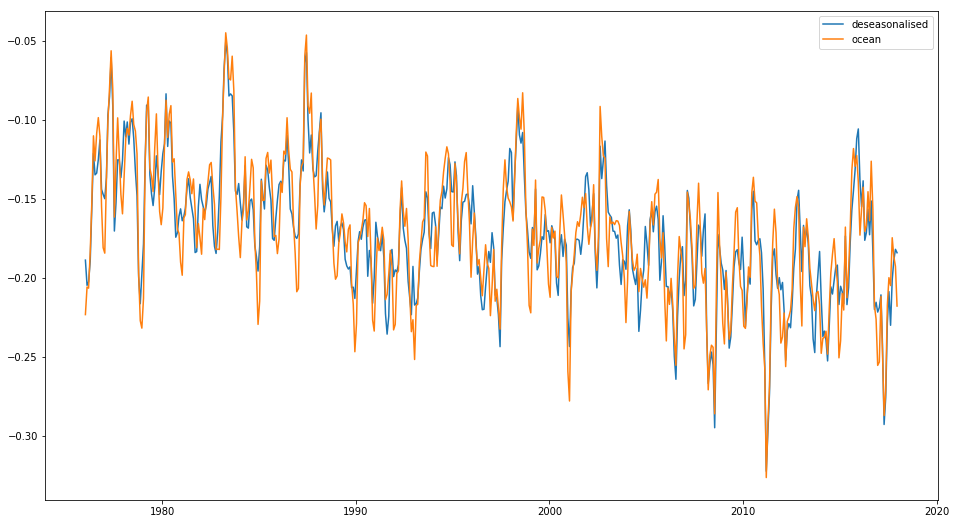

In [130]:
plt.figure(figsize=(16,9))
plt.plot(ocean.index, d_ocean, label='deseasonalised')
plt.plot(ocean.index, ocean.ocean.values, label='ocean')
plt.legend()

## Rolling trend analysis

In [139]:
des = CO2.copy().loc[1976.0410:]
des["ocean"] = d_ocean
des.head()

,CO2,ocean
Date,,
1976.0410,330.14,-0.188620
1976.1257,330.21,-0.204546
1976.2049,330.27,-0.202309
1976.2896,330.34,-0.189216
1976.3716,330.41,-0.156624


In [172]:
smooth.shape[0]

492

In [173]:
def rolling_trend(data, sink='ocean', window=10, r_plot=False):
    
    data = data[['CO2', sink]]
    
    roll_values = []
    r_values = []
    
    for i in range(0,data.shape[0]-window):
        df = data.iloc[i:i+window+1]
        stats_info = stats.linregress(df['CO2'], df[sink])
        roll_values.append(stats_info[0])
        r_values.append(stats_info[2])
        
    data.plot(x='CO2', y=sink)
    plt.ylabel('C flux to the atmosphere (GtC)')
    
    roll_df = pd.DataFrame({f'{window}-month trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/ppm/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

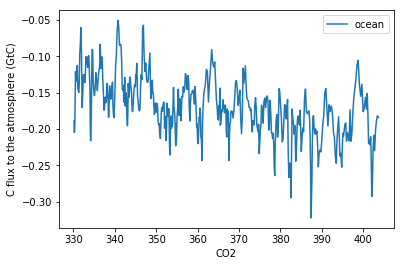

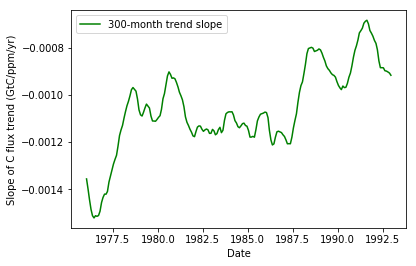

In [174]:
rolling_trend(des, window=25*12);

## 13-point smoothing

In [175]:
ocean_smooth = []
for i in range(ocean.ocean.values[6:-6].size):
    subset = ocean.ocean.values[i:i+13]
    mean = np.mean(subset)
    ocean_smooth.append(mean)

ocean_smooth = np.array(ocean_smooth)

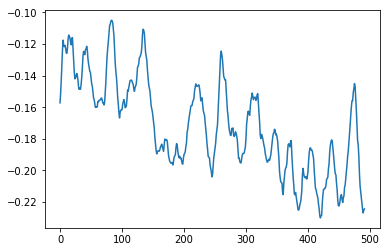

In [176]:
plt.plot(ocean_smooth)

In [177]:
smooth = CO2.copy().loc[1976.5383:2017.4548]
smooth["ocean"] = ocean_smooth
smooth.head()

,CO2,ocean
Date,,
1976.5383,330.59,-0.157199
1976.6230,330.70,-0.150620
1976.7077,330.82,-0.142568
1976.7896,330.93,-0.132816
1976.8743,331.05,-0.123026


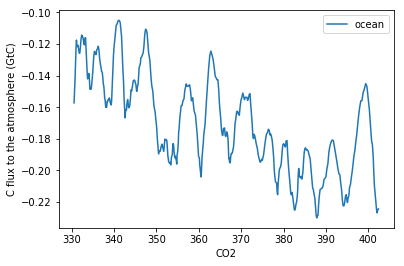

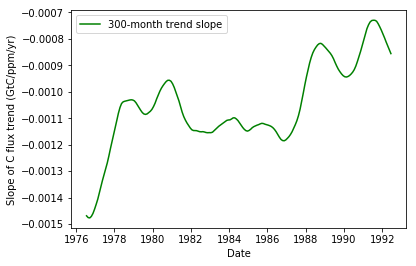

In [178]:
rolling_trend(smooth, window=25*12);